# load modules

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# 2 peak files

In [ ]:
def peak_overlap_venn2(peak1,
                       peak2,
                       label1='A',
                       label2='B',
                       col1='C1',
                       col2='C2',
                       col12='C12',
                       label_ha='center',
                       output_file=None):
    import subprocess
    from matplotlib_venn import venn2
    from matplotlib_venn._common import mix_colors
    from matplotlib.colors import ColorConverter
    a = int(
        subprocess.check_output(
            f'wc -l {peak1}'.split()).decode().strip().split()[0])
    b = int(
        subprocess.check_output(
            f'wc -l {peak2}'.split()).decode().strip().split()[0])
    ab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | wc -l',
            shell=True).decode().strip())
    ba = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak1} | wc -l',
            shell=True).decode().strip())
    intersect = (ab + ba) >> 1
    v = venn2((a - intersect, b - intersect, intersect),
              set_colors=(col1, col2),
              alpha=.5,
              set_labels=(label1, label2))
    v.get_label_by_id('10').set_text(f'{a-intersect:,}\n')
    v.get_label_by_id('01').set_text(f'\n{b-intersect:,}')
    v.get_label_by_id('11').set_text(f'{intersect:,}')
    v.get_patch_by_id('11').set_color(col12)
    v.get_patch_by_id('11').set_edgecolor('none')
    v.get_patch_by_id('11').set_alpha(0.4)
    
    if label_ha != 'auto' :
        for label in v.set_labels:
            label.set_ha(label_ha)
            
    if output_file:
        plt.savefig(output_file, transparent=True)
        plt.close()

In [ ]:
peak_overlap_venn2('Nanog_dome_excludeIgG_filtered_peaks.narrowPeak',
                   'Nanog_ChIP_filtered_peaks.narrowPeak',
                   label1='FitCUR&RUN\npeaks',
                   label2='ChIP-seq\npeaks',
                   col1='#98BDD8',
                   col2='#E4DDC3',
                   col12='#8BB38D',
                   output_file='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig2C_Venn_FitCR_ChIP_Nanog.pdf')

# 3 peak files

In [ ]:
def peak_overlap_venn3(peak1,
                       peak2,
                       peak3,
                       label1='A',
                       label2='B',
                       label3='C',
                       title='Title',
                       col1='C1',
                       col2='C2',
                       col3='C3',
                       output_file=None):
    import subprocess
    from matplotlib_venn import venn3
    from matplotlib_venn._common import mix_colors
    from matplotlib.colors import ColorConverter
    a = int(
        subprocess.check_output(
            f'wc -l {peak1}'.split()).decode().strip().split()[0])
    b = int(
        subprocess.check_output(
            f'wc -l {peak2}'.split()).decode().strip().split()[0])
    c = int(
        subprocess.check_output(
            f'wc -l {peak3}'.split()).decode().strip().split()[0])
    ab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | wc -l',
            shell=True).decode().strip())
    ba = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak1} | wc -l',
            shell=True).decode().strip())
    ac = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak3} | wc -l',
            shell=True).decode().strip())
    ca = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak1} | wc -l',
            shell=True).decode().strip())
    bc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | wc -l',
            shell=True).decode().strip())
    cb = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak2} | wc -l',
            shell=True).decode().strip())
    abc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | intersectBed -u -a - -b {peak3} | wc -l',
            shell=True).decode().strip())
    bca = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | intersectBed -u -a - -b {peak1} | wc -l',
            shell=True).decode().strip())
    cab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak1} | intersectBed -u -a - -b {peak2} | wc -l',
            shell=True).decode().strip())
    intersect_ab = (ab + ba) >> 1
    intersect_ac = (ac + ca) >> 1
    intersect_cb = (cb + bc) >> 1
    intersect_abc = (abc + bca + cab) // 3
    print(a - intersect_ab - intersect_ac + intersect_abc,
          b - intersect_ab - intersect_cb + intersect_abc,
          intersect_ab - intersect_abc,
          c - intersect_ac - intersect_cb + intersect_abc,
          intersect_ac - intersect_abc, intersect_cb - intersect_abc,
          intersect_abc)
    v = venn3(
        (a - intersect_ab - intersect_ac + intersect_abc, b - intersect_ab -
         intersect_cb + intersect_abc, intersect_ab - intersect_abc,
         c - intersect_ac - intersect_cb + intersect_abc, intersect_ac -
         intersect_abc, intersect_cb - intersect_abc, intersect_abc),
        set_colors=(col1, col2, col3),
        alpha=.5,
        set_labels=(label1, label2, label3))
    #if a - intersect_ab - intersect_ac + intersect_abc > 0:
    #    v.get_label_by_id('100').set_text(
    #        f'{a - intersect_ab - intersect_ac + intersect_abc:,}')
    #if b - intersect_ab - intersect_cb + intersect_abc > 0:
    #    v.get_label_by_id('010').set_text(
    #        f'{b - intersect_ab - intersect_cb + intersect_abc:,}')
    #if intersect_ab - intersect_abc > 0:
    #    v.get_label_by_id('110').set_text(f'{intersect_ab - intersect_abc:,}')
    #if c - intersect_ac - intersect_cb + intersect_abc > 0:
    #    v.get_label_by_id('001').set_text(
    #        f'{c - intersect_ac - intersect_cb + intersect_abc:,}')
    #if intersect_ac - intersect_abc > 0:
    #    v.get_label_by_id('101').set_text(f'{intersect_ac - intersect_abc:,}')
    #if intersect_cb - intersect_abc > 0:
    #    v.get_label_by_id('011').set_text(f'{intersect_cb - intersect_abc:,}')
    #if intersect_abc > 0:
    #    v.get_label_by_id('111').set_text(f'{intersect_abc:,}')
    if output_file:
        plt.title(title)
        plt.savefig(output_file, transparent=True)
        plt.close()

In [ ]:
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down')
peak_overlap_venn3(
    'Nanog_256_excludeIgG_filtered_peaks.narrowPeak',
    'Nanog_1k_excludeIgG_filtered_peaks.narrowPeak',
    'Nanog_dome_excludeIgG_filtered_peaks.narrowPeak',
    label1='256-cell',
    label2='1k-cell',
    label3='dome',
    title = 'Nanog',
    col1='#6F7B88',
    col2='#8DA58E',
    col3='#92B2CB',
    output_file='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig4_Venn3_reduceInput_Nanog.pdf')

# venn 6

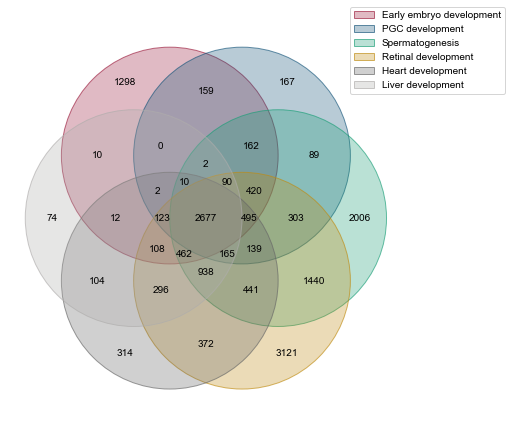

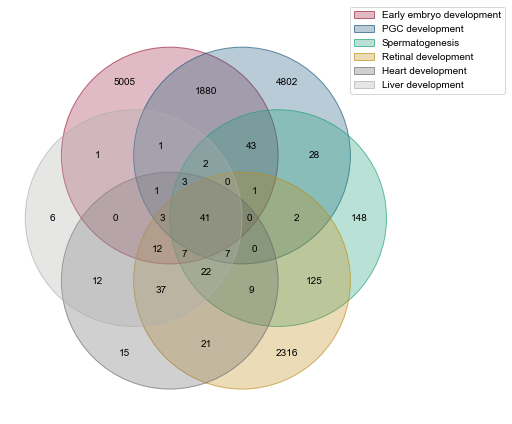

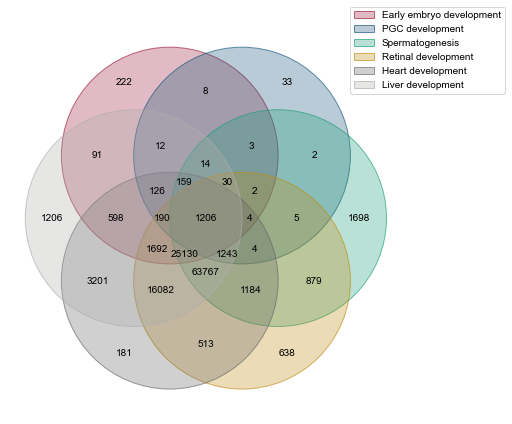

In [ ]:
from venn import pseudovenn
from venn import get_labels

for C_class in ['CHM', 'CHnonM', 'CMnonH'] :
# for C_class in ['CHM'] :
    fig, ax = plt.subplots(figsize=(6.4 * 1.25, 4.8 * 1.25), tight_layout = True)
    pseudovenn(
        listInput_total[C_class], 
        cmap=my_cmap_process6,
        ax = ax,
        alpha=0.3,
        hint_hidden = False,
        fontsize=10,
        legend_loc=None,
        
    )
    ax.legend(listInput_total[C_class].keys(), loc='lower left', bbox_to_anchor=(.85, .8))
    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make3_venn6_{C_class}_process_intersection.pdf', transparent = True)
